<a href="https://colab.research.google.com/github/Aakriti555/Nammi-task3/blob/main/NAAMII_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nibabel

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib # common way of importing nibabel
from skimage.feature import peak_local_max
from collections import deque

In [ ]:
import gdown
gdown.download(url="https://drive.google.com/file/d/1NR7OEboARP_fpseIZOY0Wy8Ir1NEYfL5/edit", output="3702_left_knee.nii.gz", fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1NR7OEboARP_fpseIZOY0Wy8Ir1NEYfL5
From (redirected): https://drive.google.com/uc?id=1NR7OEboARP_fpseIZOY0Wy8Ir1NEYfL5&confirm=t&uuid=5b8f5f0a-3153-431f-a45d-e15f86bd86dd
To: /content/3702_left_knee.nii.gz
100%|██████████| 26.2M/26.2M [00:00<00:00, 65.9MB/s]


'3702_left_knee.nii.gz'

In [ ]:
mri_file = '/content/3702_left_knee.nii.gz'
img = nib.load(mri_file)
print(type(img))

In [ ]:
print(img.shape)

(512, 512, 216)


In [ ]:
# here, we're storing the header attribute in a new variable, hdr, for easy of use
hdr = img.header

In [ ]:
hdr.get_zooms()  # it's a 1x1x1 mm MRI file!

(np.float32(0.869141), np.float32(0.869141), np.float32(2.0))

In [ ]:
img_data = img.get_fdata()

<class 'numpy.ndarray'>
(512, 512, 216)


In [ ]:
slice_index = 260  # adjust as needed
mid_slice_x = img_data[:,slice_index, :]
print(mid_slice_x.shape)

(512, 216)


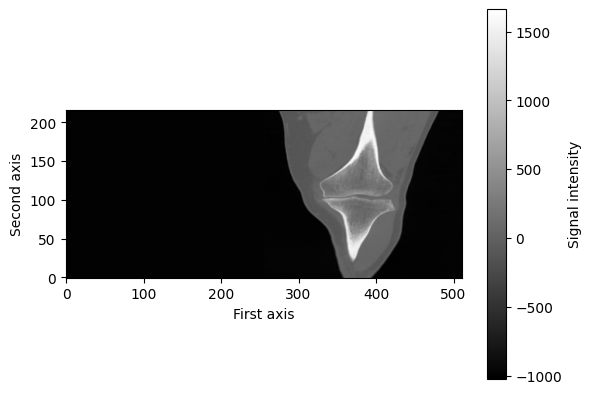

In [ ]:
# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

## Segmentation

In [ ]:
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
import plotly.graph_objects as go

import ipywidgets as widgets
from IPython.display import display
import cv2

In [ ]:
# Get the data as a NumPy array

img = img.get_fdata()

In [ ]:
img = img.transpose(1, 0, 2)
img = np.rot90(img, k=3, axes=(1, 2))

In [ ]:
# Function to update the plot
def update_slice(slice_index):
    plt.figure()
    plt.xlabel('First axis')
    plt.ylabel('Second axis')
    plt.pcolormesh(img[slice_index])
    plt.colorbar()
    plt.show()

# Create a slider
slider = widgets.IntSlider(value=0, min=200, max=320, step=1, description='Slice:')
widgets.interact(update_slice, slice_index=slider)

interactive(children=(IntSlider(value=200, description='Slice:', max=320, min=200), Output()), _dom_classes=('…

<function __main__.update_slice(slice_index)>

# Separating Bone from Background

In [ ]:
threshold = 120

# Set all values below threshold to 0
img_bones = np.where(img >= threshold, img, 0)
img_background = np.where(img < threshold, img, 0)

In [ ]:
# Function to update the plot
def update_slice(slice_index):

    plt.figure()
    plt.pcolormesh(img_bones[slice_index])
    plt.colorbar()
    plt.title(f"Bone Only Slice {slice_index}")
    plt.show()

# Create a slider
slider = widgets.IntSlider(value=260, min=200, max=320, step=1, description='Slice:')
widgets.interact(update_slice, slice_index=slider)

interactive(children=(IntSlider(value=260, description='Slice:', max=320, min=200), Output()), _dom_classes=('…

<function __main__.update_slice(slice_index)>

In [ ]:
# Visualizing the Background

def update_slice(slice_index):

    plt.figure()
    plt.pcolormesh(img_background[slice_index])
    plt.colorbar()
    plt.title(f"Bone Only Slice {slice_index}")
    plt.show()

# Create a slider
slider = widgets.IntSlider(value=0, min=200, max=320, step=1, description='Slice:')
widgets.interact(update_slice, slice_index=slider)

interactive(children=(IntSlider(value=200, description='Slice:', max=320, min=200), Output()), _dom_classes=('…

<function __main__.update_slice(slice_index)>

In [ ]:
from scipy.ndimage import gaussian_filter, median_filter

# Edge enhancement with unsharp masking
blurred = gaussian_filter(img_bones, sigma=2)
img_edges = img_bones + (img_bones - blurred) * 2  # Adjust multiplier for edge strength

In [ ]:
# Function to update the plot
def update_slice(slice_index):

    plt.figure()
    plt.pcolormesh(img_edges[slice_index])
    plt.colorbar()
    plt.title(f"Edge Enhanced Slice {slice_index}")
    plt.show()

# Create a slider
slider = widgets.IntSlider(value=0, min=200, max=300, step=1, description='Slice:')
widgets.interact(update_slice, slice_index=slider)

interactive(children=(IntSlider(value=200, description='Slice:', max=300, min=200), Output()), _dom_classes=('…

<function __main__.update_slice(slice_index)>

In [ ]:
mask = img_edges > 250
def update_mask_slice(slice_index):
    plt.figure()
    plt.pcolormesh(mask[slice_index])
    plt.colorbar()
    plt.title(f"Masked Slice {slice_index}")
    plt.show()

slider = widgets.IntSlider(value=0, min=200, max=300, step=1, description='Slice:')
widgets.interact(update_mask_slice, slice_index=slider)

interactive(children=(IntSlider(value=200, description='Slice:', max=300, min=200), Output()), _dom_classes=('…

<function __main__.update_mask_slice(slice_index)>

In [ ]:
from skimage.morphology import remove_small_objects
from scipy.ndimage import binary_fill_holes

# Remove small connected components (3D-aware)
cleaned_mask = remove_small_objects(mask, min_size=2000, connectivity=1)

# First pass: fill holes in axial slices (XY planes)
filled_mask = np.zeros_like(cleaned_mask, dtype=bool)
for i in range(cleaned_mask.shape[0]):
    filled_mask[i] = binary_fill_holes(cleaned_mask[i])

# Second pass: fill holes in sagittal slices (YZ planes)
for j in range(filled_mask.shape[2]):
    filled_mask[:, :, j] = binary_fill_holes(filled_mask[:, :, j])

In [ ]:
def update_mask_slice(slice_index):
    plt.figure()
    plt.pcolormesh(filled_mask[slice_index])
    plt.colorbar()
    plt.title(f"Partially Filled and Noise Free Slice {slice_index}")
    plt.show()

slider = widgets.IntSlider(value=0, min=200, max=300, step=1, description='Slice:')
widgets.interact(update_mask_slice, slice_index=slider)

interactive(children=(IntSlider(value=200, description='Slice:', max=300, min=200), Output()), _dom_classes=('…

<function __main__.update_mask_slice(slice_index)>

## Separate Femur from Tibia

In [ ]:
from scipy.ndimage import label, center_of_mass

# filled_mask is a 2D boolean mask where both bones are connected regions

# Label connected components
labeled_mask, num_labels = label(filled_mask)

# Compute vertical (y-axis) centroids
centroids = center_of_mass(filled_mask, labeled_mask, range(1, num_labels + 1))
centroids_y = [c[0] for c in centroids]  # y-coordinates (row)

# Sort labels by vertical position (top = femur, bottom = tibia)
sorted_labels = [label_idx for _, label_idx in sorted(zip(centroids_y, range(1, num_labels + 1)))]

# Create masks
femur_mask = (labeled_mask == sorted_labels[0]) | (labeled_mask == sorted_labels[1])
tibia_mask = labeled_mask == sorted_labels[2]


In [ ]:
def update_mask_slice(slice_index):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    im1 = axs[0].pcolormesh(tibia_mask[slice_index])
    axs[0].set_title(f"Tibia Mask Slice {slice_index}")
    plt.colorbar(im1, ax=axs[0])

    im2 = axs[1].pcolormesh(femur_mask[slice_index])
    axs[1].set_title(f"Femur Mask Slice {slice_index}")
    plt.colorbar(im2, ax=axs[1])

    plt.show()

slider = widgets.IntSlider(value=0, min=200, max=300, step=1, description='Slice:')
widgets.interact(update_mask_slice, slice_index=slider)

interactive(children=(IntSlider(value=200, description='Slice:', max=300, min=200), Output()), _dom_classes=('…

<function __main__.update_mask_slice(slice_index)>

## Filling the internal gaps

In [ ]:
def preprocess_and_fill(mask_bool, kernel_size=15, iterations=2):
    # Convert boolean mask to uint8 for cv2 operations (0 and 255)
    mask_uint8 = mask_bool.astype(np.uint8) * 255

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    closed = cv2.morphologyEx(mask_uint8, cv2.MORPH_CLOSE, kernel, iterations=iterations)

    # Convert back to boolean for filling holes
    closed_bool = closed.astype(bool)

    # Fill holes on the boolean mask
    filled = binary_fill_holes(closed_bool)

    return filled

# Apply separately
femur_mask_filled = preprocess_and_fill(femur_mask)
tibia_mask_filled = preprocess_and_fill(tibia_mask)

In [ ]:
def update_mask_slice(slice_index):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    im1 = axs[0].pcolormesh(tibia_mask_filled[slice_index])
    axs[0].set_title(f"Tibia Filled Slice {slice_index}")
    plt.colorbar(im1, ax=axs[0])

    im2 = axs[1].pcolormesh(femur_mask_filled[slice_index])
    axs[1].set_title(f"Femur Filled Slice {slice_index}")
    plt.colorbar(im2, ax=axs[1])

    plt.show()

slider = widgets.IntSlider(value=0, min=200, max=300, step=1, description='Slice:')
widgets.interact(update_mask_slice, slice_index=slider)

interactive(children=(IntSlider(value=200, description='Slice:', max=300, min=200), Output()), _dom_classes=('…

<function __main__.update_mask_slice(slice_index)>

In [ ]:
femur_segment = img * femur_mask_filled
tibia_segment = img * tibia_mask_filled
overall_mask = femur_mask_filled | tibia_mask_filled
overall_segment = img * overall_mask

In [ ]:
def update_mask_slice(slice_index):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    im1 = axs[0].pcolormesh(femur_segment[slice_index])
    axs[0].set_title(f"Femur Segment Slice {slice_index}")
    plt.colorbar(im1, ax=axs[0])

    im2 = axs[1].pcolormesh(tibia_segment[slice_index])
    axs[1].set_title(f"Tibia Segment Slice {slice_index}")
    plt.colorbar(im2, ax=axs[1])

    im3 = axs[2].pcolormesh(overall_segment[slice_index])
    axs[2].set_title(f"Overall Segment Slice {slice_index}")
    plt.colorbar(im3, ax=axs[2])

    plt.tight_layout()
    plt.show()

slider = widgets.IntSlider(value=0, min=200, max=300, step=1, description='Slice:')
widgets.interact(update_mask_slice, slice_index=slider)


interactive(children=(IntSlider(value=200, description='Slice:', max=300, min=200), Output()), _dom_classes=('…

<function __main__.update_mask_slice(slice_index)>

In [ ]:
start_slice = 200
end_slice = 300

# Cropped femur and tibia segments
femur_segment_cropped = femur_segment[start_slice:end_slice]
tibia_segment_cropped = tibia_segment[start_slice:end_slice]


In [ ]:
# # Optional visualization
# plt.figure(figsize=(10, 4))
# plt.subplot(1, 2, 1)
# plt.imshow(femur_mask[:, 255, :].T, cmap='gray', origin='lower')
# plt.title('Femur Mask')

# plt.subplot(1, 2, 2)
# plt.imshow(tibia_mask[:, 267, :].T, cmap='gray', origin='lower')
# plt.title('Tibia Mask')
# plt.show()

# 2. Conversion of 2D Pretrained Model to 3D

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
import torchvision.models as models
from collections import OrderedDict
import copy

In [ ]:
def inflate_conv2d_to_conv3d(conv2d, depth=3):
    """
    Inflate a Conv2d to Conv3d by repeating the weights along a new depth
    dimension and padding so that D is preserved.
    """
    w2d = conv2d.weight.data
    w3d = w2d.unsqueeze(2).repeat(1, 1, depth, 1, 1) / depth

    pad_d = depth // 2

    conv3d = nn.Conv3d(
        in_channels=conv2d.in_channels,
        out_channels=conv2d.out_channels,
        kernel_size=(depth, *conv2d.kernel_size),
        stride=(1, *conv2d.stride),
        padding=(pad_d, *conv2d.padding),
        bias=(conv2d.bias is not None)
    )
    conv3d.weight.data = w3d
    if conv2d.bias is not None:
        conv3d.bias.data = conv2d.bias.data.clone()
    return conv3d


def pad_to_match(x, target):
    """Pad tensor `x` to match the spatial shape of `target`."""
    diff = [t - s for s, t in zip(x.shape[2:], target.shape[2:])]
    pad = [p for d in reversed(diff) for p in (0, d)]  # [W, H, D]
    return F.pad(x, pad)



def convert_densenet2d_to_3d(model2d, depth=3):
    model3d = copy.deepcopy(model2d)

    def recursively_convert(module):
        for name, child in list(module.named_children()):
            if isinstance(child, nn.Conv2d):
                setattr(module, name, inflate_conv2d_to_conv3d(child, depth))
            elif isinstance(child, nn.BatchNorm2d):
                new_bn = nn.BatchNorm3d(child.num_features)
                new_bn.weight.data = child.weight.data.clone()
                new_bn.bias.data = child.bias.data.clone()
                new_bn.running_mean = child.running_mean.clone()
                new_bn.running_var = child.running_var.clone()
                setattr(module, name, new_bn)
            elif isinstance(child, nn.AdaptiveAvgPool2d):
                setattr(module, name, nn.AdaptiveAvgPool3d((1, 1, 1)))
            elif isinstance(child, nn.MaxPool2d):
                setattr(module, name, nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2)))
            elif isinstance(child, nn.AvgPool2d):
                setattr(module, name, nn.AvgPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2)))
            else:
                recursively_convert(child)

    recursively_convert(model3d.features)
    return model3d

In [ ]:
model2d = models.densenet121(pretrained=True)
model3d = convert_densenet2d_to_3d(model2d)
model3d.eval()
print("Done")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 86.8MB/s]


Done


In [ ]:
def extract_feature_vector(model, volume_tensor):
    with torch.no_grad():
        x = model.features(volume_tensor)
        print("feature map shape:", x.shape)      #torch.Size([1, 1024, D', H', W'])
        pooled = F.adaptive_avg_pool3d(x, (1, 1, 1))
        print("after pooling:", pooled.shape)
        vector = pooled.view(pooled.size(0), -1).cpu().numpy()
    return vector

In [ ]:
from collections import OrderedDict

feat_maps = OrderedDict()

conv_layers = []
for name, module in model3d.features.named_modules():
    if isinstance(module, torch.nn.Conv3d):
        conv_layers.append(name)

# Pick indices: last (-1), third-last (-3), fifth-last (-5)
targets = {
    'last':   conv_layers[-1],
    'third':  conv_layers[-3],
    'fifth':  conv_layers[-5],
}

# Register hooks
for key, layer_name in targets.items():
    module = dict(model3d.features.named_modules())[layer_name]
    module.register_forward_hook(
        lambda self, input, output, k=key: feat_maps.__setitem__(k, output)
    )

In [ ]:
def preprocess(volume, hu_min=-1000, hu_max=1000):
    clipped = np.clip(volume, hu_min, hu_max)
    normed = (clipped - hu_min) / (hu_max - hu_min)
    tensor = torch.tensor(normed[None, None], dtype=torch.float32)  # (1,1,D,H,W)
    # Reduce the input dimensions
    tensor = F.interpolate(tensor, size=(256, 128, 256), mode='trilinear', align_corners=False)
    tensor = tensor.repeat(1, 3, 1, 1, 1)  # (1,3,D,H,W)

    # _, _, d, h, w = tensor.shape
    # pad_d = (32 - d % 32) % 32
    # pad_h = (32 - h % 32) % 32
    # pad_w = (32 - w % 32) % 32

    # padding = (0, pad_w, 0, pad_h, 0, pad_d)
    # tensor = F.pad(tensor, padding)

    return tensor



tibia_tensor = preprocess(tibia_segment_cropped)
femur_tensor = preprocess(femur_segment_cropped)
background_tensor = preprocess(img_background)

In [ ]:
from torch.nn import CosineSimilarity
import torch.nn.functional as F

cos = CosineSimilarity(dim=1, eps=1e-6)

def get_region_features(volume_tensor):
    """
    volume_tensor: torch.Tensor shape (1,3,D,H,W) on CPU
    returns dict: {'last': torch.Tensor, 'third': torch.Tensor, 'fifth': torch.Tensor}
    """
    feat_maps.clear()
    with torch.no_grad():
        _ = model3d.features(volume_tensor)   # forward through features

    vectors = {}
    for key, fmap in feat_maps.items():
        # Global average pooling to (1, C, 1, 1, 1)
        pooled = F.adaptive_avg_pool3d(fmap, (1,1,1))
        vec = pooled.view(pooled.size(0), -1)  # (1, C)
        vectors[key] = vec
    return vectors

In [ ]:
regions = {
    'tibia': tibia_tensor,
    'femur': femur_tensor,
    'background': background_tensor
}

rows = []
pairs = [('tibia','femur'), ('tibia','background'), ('femur','background')]

layers = ['last','third','fifth']

# Precompute features per region
region_feats = {r: get_region_features(t) for r, t in regions.items()}

for img_idx in [0]:
    for (r1, r2) in pairs:
        feats1 = region_feats[r1]
        feats2 = region_feats[r2]
        row = {
            'image': img_idx,
            'pair': f"{r1}_{r2}"
        }
        for layer in layers:
            sim = cos(feats1[layer], feats2[layer]).item()
            row[f"cos_{layer}"] = sim
        rows.append(row)

df = pd.DataFrame(rows)
csv_path = "knee_region_cosine_similarities.csv"
df.to_csv(csv_path, index=False)
print(f"Saved similarities to {csv_path}")


Saved similarities to knee_region_cosine_similarities.csv


,image,pair,cos_last,cos_third,cos_fifth
0,0,tibia_femur,0.873247,0.751816,0.437909
1,0,tibia_background,0.794982,0.769413,0.651196
2,0,femur_background,0.804413,0.727484,0.478395


In [ ]:
df

,image,pair,cos_last,cos_third,cos_fifth
0,0,tibia_femur,0.873247,0.751816,0.437909
1,0,tibia_background,0.794982,0.769413,0.651196
2,0,femur_background,0.804413,0.727484,0.478395
